<a id='contenidos'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargar-sets-de-datos" data-toc-modified-id="Cargar-sets-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cargar sets de datos</a></span></li><li><span><a href="#Principales-barrios-donde-finalizaron-los-viajes" data-toc-modified-id="Principales-barrios-donde-finalizaron-los-viajes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Principales barrios donde finalizaron los viajes</a></span></li><li><span><a href="#Principales-compañias-con-la-mayor-cantidad-de-viajes" data-toc-modified-id="Principales-compañias-con-la-mayor-cantidad-de-viajes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Principales compañias con la mayor cantidad de viajes</a></span></li><li><span><a href="#Pruebas-de-hipótesis" data-toc-modified-id="Pruebas-de-hipótesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pruebas de hipótesis</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

In [1]:
# importamos las librerias a ocupar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

sns.set_palette(palette='tab10')

# Introducción  
En este proyecto vamos a analizar datos de Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Nuestra tarea será encontrar patrones en la información disponible. Queremos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.  
Trabajaremos con datos provenientes de bases de datos y de  la web, analizaremos datos de los competidores y probaremos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

[Volver a Contenidos](#contenidos)
## Cargar sets de datos  
Vamos a cargar los archivos `csv` en DataFrames para poder revisar su estructura.

In [2]:
# set de datos para los viajes realizados por las distintas compañias
data_trips=pd.read_csv('moved_project_sql_result_01.csv')

In [3]:
# set de datos para los barrios de Chicago doonde terminaron los viajes
data_dropoff_location=pd.read_csv('moved_project_sql_result_04.csv')

In [4]:
# set de datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
data_loop_ohare=pd.read_csv('moved_project_sql_result_07.csv')

Revisemos la información general de cada dataframe.

In [5]:
# mostremos información del dataframe para la cantidad de viajes realizados por las compañias
data_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# mostramos parte de los datos
data_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Podemos notar que para el dataframe que contiene los datos de la cantidad de viajes realizados por cada compañia, el nombre de las columnas está bien definido y el tipo de datos corresponde a la información que contiene.

In [7]:
# mostremos información del dataframe para los barrios de Chicago donde terminaron los viajes
data_dropoff_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# mostramos parte de los datos
data_dropoff_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


Podemos notar que para el dataframe que contiene los datos sobre el promedio de viajes que terminaron en algún barrio de Chicago, el nombre de las columnas está bien definido y el tipo de datos corresponde la información contenida en cada columna.

In [9]:
# mostremos información del dataframe para los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare
data_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
# mostremos una parte de los datos
data_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Podemos notar que para el dataframe que contiene los datos sobre los viajes realizados desde el Loop hasta el Aeropuerto Internatiocal O'Hare, el nombre de las columnas está bien definido pero debemos cambiar el tipo de datos  de la columna `'start_ts'` ya que está columna debe contener datos de tipo `'date'` y no de tipo `'object'`.

In [11]:
# cambiamos el tipo de datos de la columna 'start_ts' a tipo fecha
data_loop_ohare['start_ts']=pd.to_datetime(data_loop_ohare['start_ts'],format='%Y-%m-%d')

In [12]:
# verificamos que se haya hecho el cambio
data_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Agreguemos ahora una columna para extraer el día de la semana.

In [13]:
# creamos una columna para extraer el nombre del día de la semana
data_loop_ohare['day_of_week']=data_loop_ohare['start_ts'].dt.day_name()

[Volver a Contenidos](#contenidos)
## Principales barrios donde finalizaron los viajes  
Vamos a identificar los diez principales barrios donde finalizaron los viajes y a crear gráficas para comparar la cantidad de viajes finalizados en cada barrio.

In [14]:
# diez principales barrios con la mayor cantidad de viajes finalizados
table_dropoff_location=data_dropoff_location.sort_values(by='average_trips',ascending=False)[0:10]
table_dropoff_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


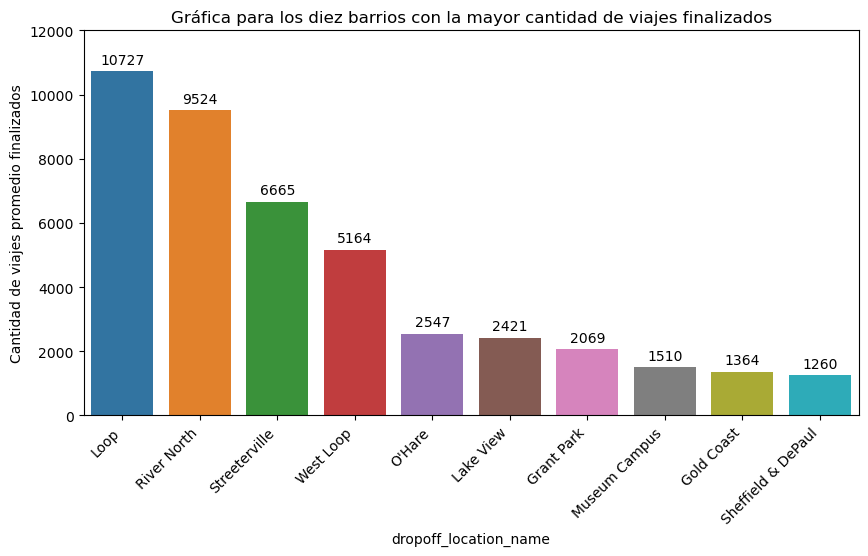

In [15]:
# creamos el gráfico de barras para mostrar los principales barrios donde finalizaron los viajes
f,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=table_dropoff_location,x='dropoff_location_name',y='average_trips')
# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')              
plt.xticks(rotation=45,ha='right')
plt.ylim(0,12000)
plt.ylabel('Cantidad de viajes promedio finalizados')
plt.title('Gráfica para los diez barrios con la mayor cantidad de viajes finalizados')
plt.show()

De la gráfica anterior podemos notar que los barrios: **Loop, River North, Streeterville y West Loop**, son los barrios con la mayor cantidad de viajes finalizados, lo cual parece lógico ya que estos barrios están muy cerca al centro de la ciudad de Chicago. Mientras que los barrios: **Gold Coast y Sheffield & DePaul**, son los dos barrios con la menor cantidad de viajes finalizados.

[Volver a Contenidos](#contenidos)
## Principales compañias con la mayor cantidad de viajes  
Vamos a identificar las diez principales compañias con la mayor cantidad de viajes y a crear gráficas para comparar la cantidad de viajes realizados por cada compañia.

In [16]:
# diez principales compañias de taxis con la mayor cantidad de viajes
table_trips=data_trips.sort_values(by='trips_amount',ascending=False)[0:10]
table_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


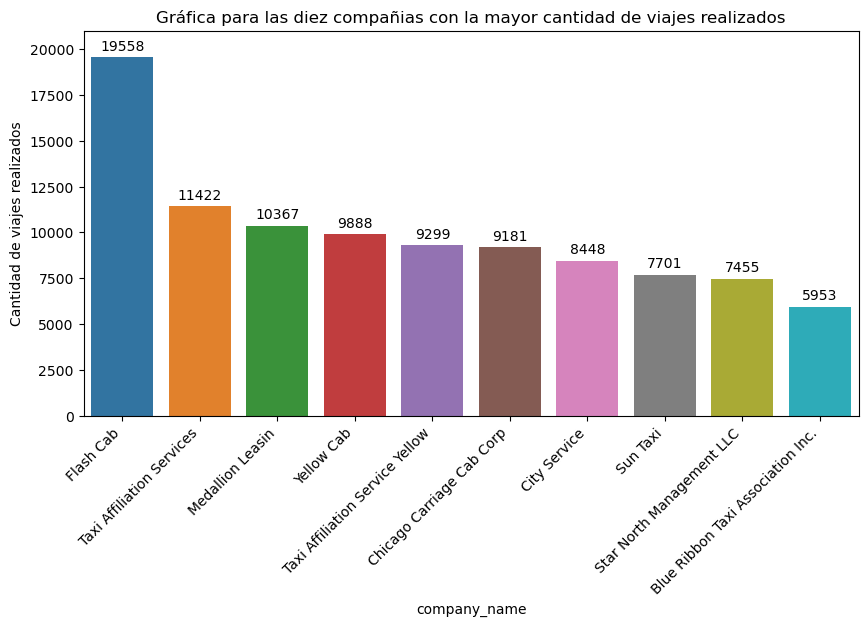

In [17]:
# creamos el gráfico de barras para mostrar los viajes realizados por cada compañia
f,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=table_trips,x='company_name',y='trips_amount')

# For each bar: Place a label
for rect in ax.patches:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 3
    # Vertical alignment 'va'

    # Use Y value as label and format number with zero decimal place
    label = "{:.0f}".format(y_value)

    # Create annotation
    ax.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va='bottom')              
plt.xticks(rotation=45,ha='right')
plt.ylim(0,21000)
plt.ylabel('Cantidad de viajes realizados')
plt.title('Gráfica para las diez compañias con la mayor cantidad de viajes realizados')
plt.show()

De la gráfica anterior notamos que la compañia **Flash Cab** tiene la mayor cantidad de viajes realizados, prácticamente el doble que la compañia que le sigue en cantidad de viajes realizados. La compañia **Blue Ribbon Taxi Association Inc.,** es la compañia con la menor cantidad de viajes realizados, de las diez compañias con la mayor cantidad de viajes.

[Volver a Contenidos](#contenidos)
## Pruebas de hipótesis  
Vamos a probar la hipótesis de que **la duración promedio de los viajes desde el Loop hasta el Aeropuerto de Internacional de O'Hare cambia los sábados lluviosos.**  
Para probar esta hipótesis vamos a emplear los datos contenidos en el dataframe `'data_loop_ohare'`. Este dataframe contiene los datos de los viajes realizados desde el Loop hasta el Aeropuerto Internacional de O'Hare los días sábados, además de las condiciones climáticas que prevalecieron ese día.

In [18]:
# mostramos parte de los datos
data_loop_ohare.head()

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [19]:
# resumen de las condiciones climáticas para los viajes realizados desde el barrio de Loop hasta el barrio de O'Hare
data_loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

Probemos la hipótesis siguiente:  
- **Hipótesis nula:** la duración promedio de los viajes desde el Loop hasta el Aeropuerto de Internacional de O'Hare es la misma en los días sábados lluviosos.
- **Hipótesis alternativa:** la duración promedio de los viajes desde el Loop hasta el Aeropuerto de Internacional de O'Hare no es la misma en los días sábados lluviosos.

Ya que vamos a comparar la media de dos poblaciones, usaremos la prueba estadística `'t de Student'` (ttes_ind) con un nivel **alpha=0.05 de significancia.**

In [20]:
# creamos el set de datos para los días sin lluvia
sample_not_rain=data_loop_ohare.query('weather_conditions=="Good"')['duration_seconds']

# creamos el set de datos para los días con lluvia
sample_rain=data_loop_ohare.query('weather_conditions=="Bad"')['duration_seconds']

In [21]:
# revisamos el tamaño del dataset 'sample_not_rain' sin valores nulos
print("el tamaño de sample_not_rain es: ",len(sample_not_rain[sample_not_rain.notna()]))
print("contiene: ",sample_not_rain.isna().sum(),"valores nulos")

el tamaño de sample_not_rain es:  888
contiene:  0 valores nulos


In [22]:
# revisamos el tamaño del dataset 'sample_rain' sin valores nulos
print("el tamaño de sample_rain es: ",len(sample_rain[sample_rain.notna()]))
print("contiene: ",sample_rain.isna().sum(),"valores nulos")

el tamaño de sample_rain es:  180
contiene:  0 valores nulos


Podemos notar que las muestras no tienen los mismos tamaños pero no contienen valores nulos. Para decidir si en la prueba estadística `'t de Student'` usamos la opción `'equal_var=True'`, vamos a realizar la prueba de `'Levene'` a la varianza de las muestras.

La **prueba de 'Levene'** sirve para probar:

- **Hipótesis nula:** Las varianzas de dos poblaciones son iguales
- **Hipótesis alternativa:** Las varianzas de las dos poblaciones no son iguales  

Usaremos un nivel **'alpha=0.05' de significancia.**

In [23]:
# Prueba de 'Levene' sobre las varianzas de las muestras
# el nivel de significancia estadística
alpha = 0.05

#realizamos la prueba de 'levene'
results=st.levene(sample_not_rain,sample_rain)

# mostramos las varianzas de cada muestra
print(f'La varianza de sample_not_rain es: {np.var(sample_not_rain)}',end='\n')
print(f'La varianza de sample_rain es: {np.var(sample_rain)}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula de que las varianzas son iguales")
else:
    print("No rechazamos la hipótesis nula")

La varianza de sample_not_rain es: 575732.9308497686
La varianza de sample_rain es: 517403.5633024689

p-value:  0.5332038671974493
No rechazamos la hipótesis nula


**Concluimos entonces que no hay suficiente evidencia para rechazar la hipótesis nula de que las varianzas son iguales.** Así que vamos a proceder a usar el parámtero `'equal_var=True'` en la prueba `'t de Student'`.

In [24]:
# Prueba 't de Student' para las medias de las muestras
# el nivel de significancia estadística
alpha = 0.05

results = st.ttest_ind(sample_not_rain, sample_rain,equal_var=True)

# mostramos las medias de cada muestra
print(f'La media de sample_not_rain es: {np.mean(sample_not_rain)}',end='\n')
print(f'La media de sample_rain es: {np.mean(sample_rain)}',end='\n\n')
# mostramos las varianzas de cada muestra
print(f'La varianza de sample_not_rain es: {np.var(sample_not_rain)}',end='\n')
print(f'La varianza de sample_rain es: {np.var(sample_rain)}',end='\n\n')
print('p-value: ', results.pvalue)

# si el valor p es menor que alfa, rechazamos la hipótesis
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

La media de sample_not_rain es: 1999.6756756756756
La media de sample_rain es: 2427.2055555555557

La varianza de sample_not_rain es: 575732.9308497686
La varianza de sample_rain es: 517403.5633024689

p-value:  6.517970327099473e-12
Rechazamos la hipótesis nula


Concluimos por tanto que: **la duración promedio de los viajes desde el Loop hasta el Aeropuerto de Internacional de O'Hare no es la misma en los días sábados lluviosos.**

[Volver a Contenidos](#contenidos)
## Conclusiones

1. Los barrios que están más cercanos al centro de la Ciudad de Chicago: **Loop, River North, Streeterville y West Loop, tienen la mayor cantidad de viajes finalizados.** Mientras que los barrios: **Gold Coast y Sheffield & DePaul, son los dos barrios con la menor cantidad de viajes finalizados.**
1. La compañia **Flash Cab tiene la mayor cantidad de viajes realizados,** mientras que la compañia **Blue Ribbon Taxi Association Inc., es la compañia con la menor cantidad de viajes realizados,** de las diez compañias con la mayor cantidad de viajes.
1. **La duración promedio de los viajes desde el Loop hasta el Aeropuerto de Internacional de O'Hare no es la misma en los días sábados lluviosos.**